# Lesson 3 - Dataset
- 이번 실습자료에서는 데이터셋 전처리하는 방법인 Data Augmentation을 시각화를 통해 알아봅시다.
## 0. Libraries & Configurations
- 시각화에 필요한 라이브러리와 이미지 경로를 설정하여 이미지를 불러옵니다.

In [7]:
import os
import sys
from glob import glob
import requests
import random
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from time import time

from albumentations import *

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data_dir = '/mnt/ssd/data/mask_final/train'
img_path = f'{data_dir}/images/003101_female_Asian_18/mask4.jpg'
img = np.array(Image.open(img_path))

img_paths = glob(os.path.join(f'{data_dir}/images', '**/*'))
random.shuffle(img_paths)

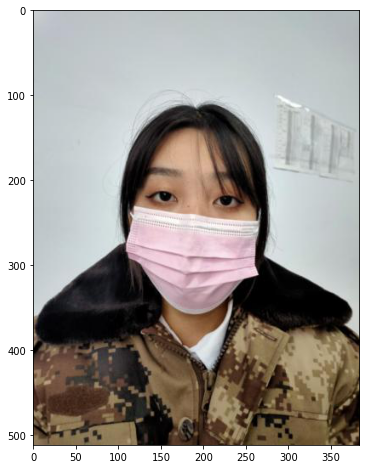

In [9]:
plt.figure(figsize=(16,8))
plt.imshow(img)

## 1. Basic Augmentations

### 1.1 Flips
- 이미지를 좌우, 상하 반전 시킵니다.

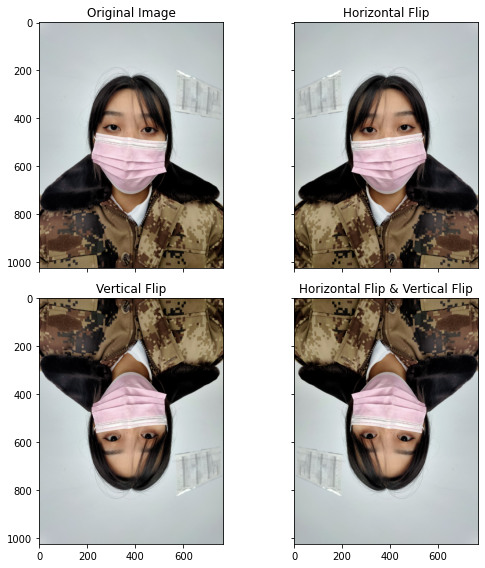

In [4]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

axes[0][0].imshow(img)
axes[0][0].set_title(f'Original Image')

trfm = Compose([
            HorizontalFlip(p=1.0),
        ], p=1.0)
axes[0][1].imshow(trfm(image=img)['image'])
axes[0][1].set_title(f'Horizontal Flip')

trfm = Compose([
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][0].imshow(trfm(image=img)['image'])
axes[1][0].set_title(f'Vertical Flip')

trfm = Compose([
            HorizontalFlip(p=1.0),
            VerticalFlip(p=1.0),
        ], p=1.0)
axes[1][1].imshow(trfm(image=img)['image'])
axes[1][1].set_title(f'Horizontal Flip & Vertical Flip')

plt.tight_layout()

### 1.2 RandomCrop
- 이미지를 동일한 크기로 랜덤하게 잘라냅니다.

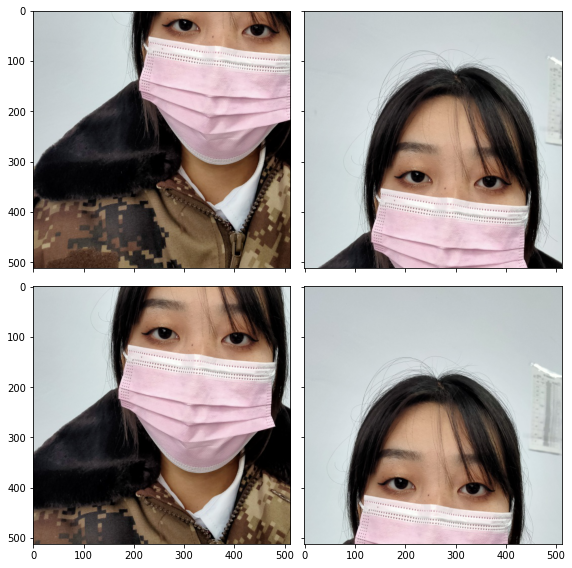

In [5]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomCrop(height=512, width=512, p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

### 1.3 Shift, Scale, Rotate
- 이미지를 랜덤하게 Affine Transform 시킵니다.

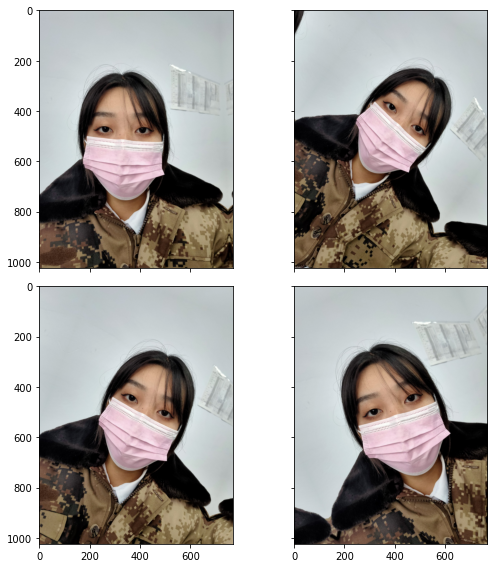

In [6]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            ShiftScaleRotate(p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

### 1.4 Brightness, Contrast
- 이미지의 밝기와 대조를 랜덤하게 변화시킵니다.

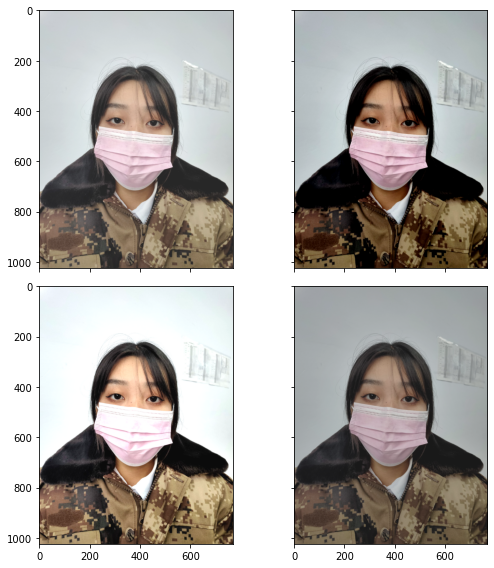

In [7]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=1.0),
        ], p=1.0)
for i in range(n_rows*n_cols):
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])

plt.tight_layout()

### 1.5 Gaussian Noise
- 이미지에 랜덤하게 가우시안 노이즈를 씌웁니다.

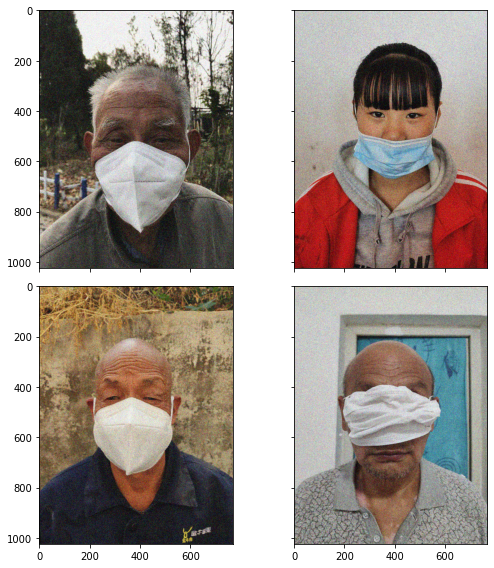

In [8]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            GaussNoise(var_limit=(1000, 1600), p=1.0),
        ], p=1.0)
random.shuffle(img_paths)
for i in range(n_rows*n_cols):
    _img = np.array(Image.open(img_paths[i]))
    axes[i%n_rows][i//n_cols].imshow(trfm(image=_img)['image'])

plt.tight_layout()

### 1.6 Put All Togetehr
- 위에서 살펴본 모든 Augmentation 기법을 적용시켜봅니다.

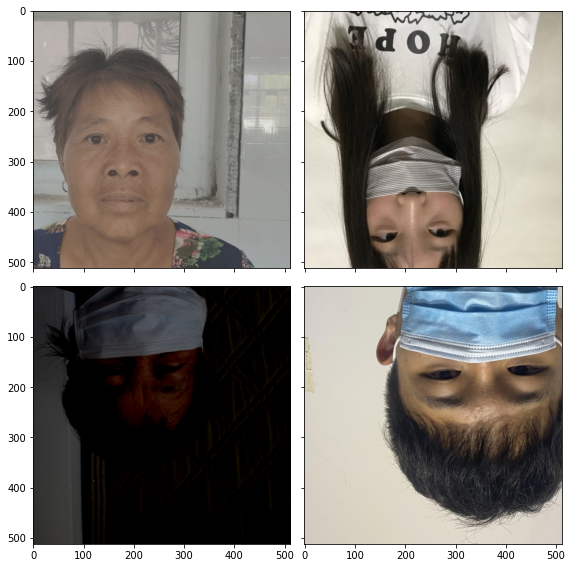

In [9]:
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8, 8))

trfm = Compose([
            RandomCrop(height=512, width=512, p=1.0),
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=0.5),
            GaussNoise(var_limit=(1000, 1600), p=0.3),
        ], p=1.0)
random.shuffle(img_paths)
for i in range(n_rows*n_cols):
    _img = np.array(Image.open(img_paths[i]))
    axes[i%n_rows][i//n_cols].imshow(trfm(image=_img)['image'])

plt.tight_layout()

## 2. Pixel-level transforms
- 위에서 살펴본 Augmentation 외에도 많은 방법이 존재합니다.
- 이 부분에서는 이미지에 대한 공간적인 변화없이, 픽셀 값 자체만 바꾸는 다양한 Pixel-level Transform을 시각화 해봅니다.

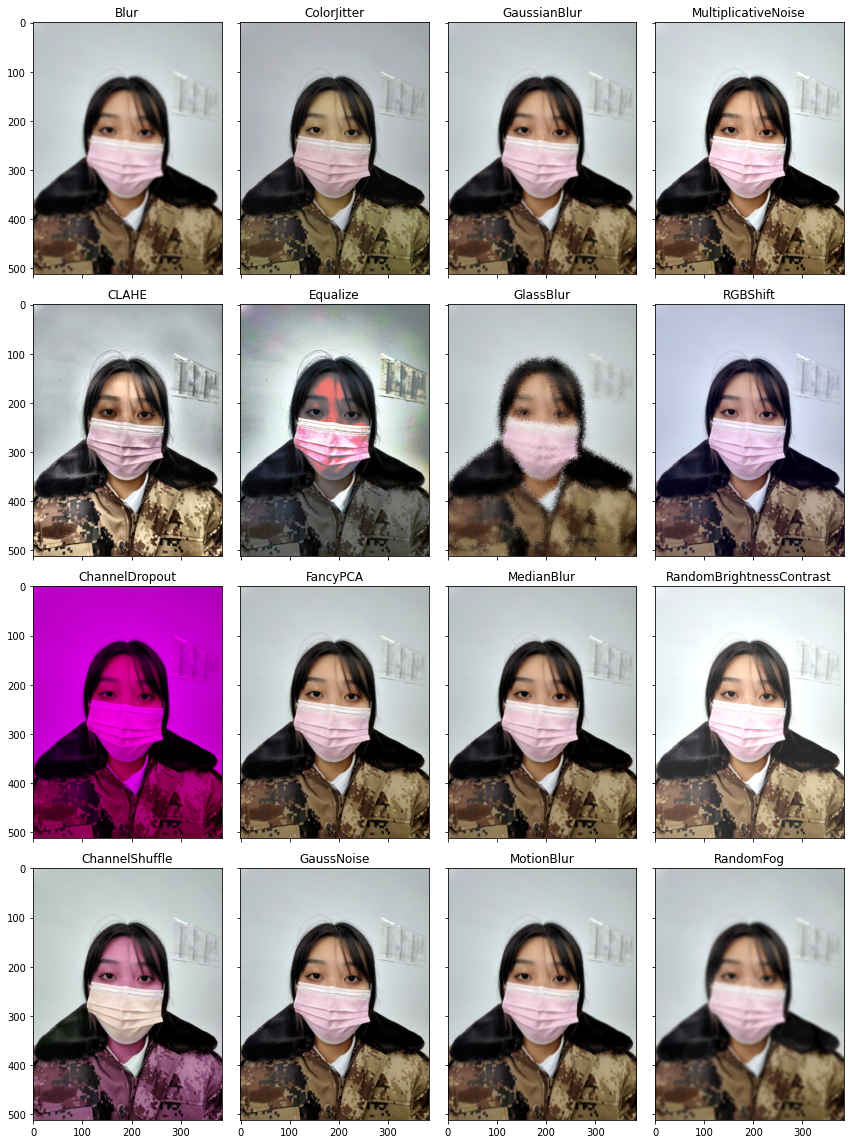

In [10]:
n_rows, n_cols = 4, 4

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [Blur,
           CLAHE,
           ChannelDropout,
           ChannelShuffle,
           ColorJitter,
           Equalize,
           FancyPCA,
           GaussNoise,
           GaussianBlur,
           GlassBlur,
           MedianBlur,
           MotionBlur,
           MultiplicativeNoise,
           RGBShift,
           RandomBrightnessContrast,
           RandomFog,
           Solarize]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

## 3. Spatial-level Augmentation
- 이 부분에서는 공간적으로 이미지를 변형시켜봅니다.

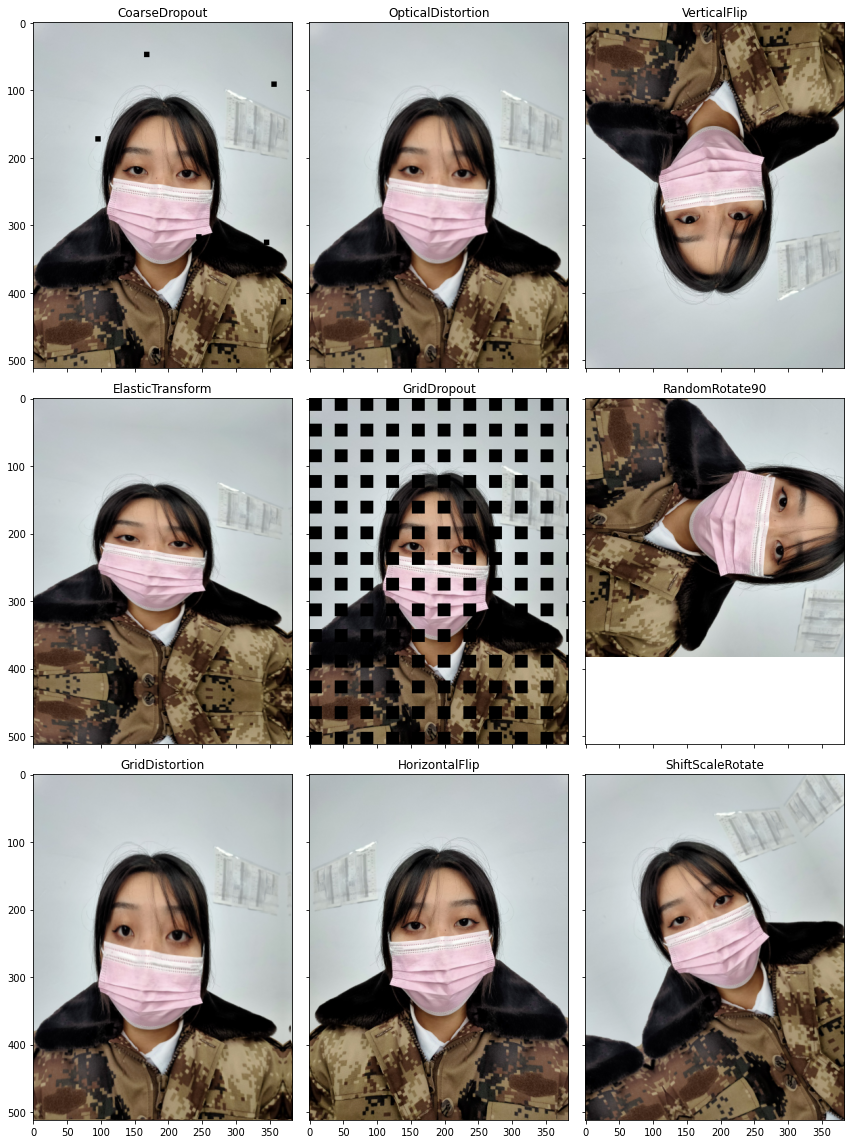

In [11]:
n_rows, n_cols = 3, 3

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [CoarseDropout,
           ElasticTransform,
           GridDistortion,
           OpticalDistortion,
           GridDropout,
           HorizontalFlip,
           VerticalFlip,
           RandomRotate90,
           ShiftScaleRotate]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'])
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

## 4. Medical Image Augmentation
- 의료 영상은 일반적인 이미지와는 다른 형태로 존재합니다. 눈에 보이는 특징으로는 흑백 영상이라는 점이고 촬영 방식에 따라 공간적인 변형을 최소화해주어야 할 경우도 있습니다.
- 이 부분에서는 의료 영상에 사용되는 Data Augmentation을 시각화합니다.

In [10]:
med_url = 'https://prod-images-static.radiopaedia.org/images/13656005/bd937738ad6223a03f8aedcf4920a7_big_gallery.jpeg'
img = np.array(Image.open(requests.get(med_url, stream=True).raw))

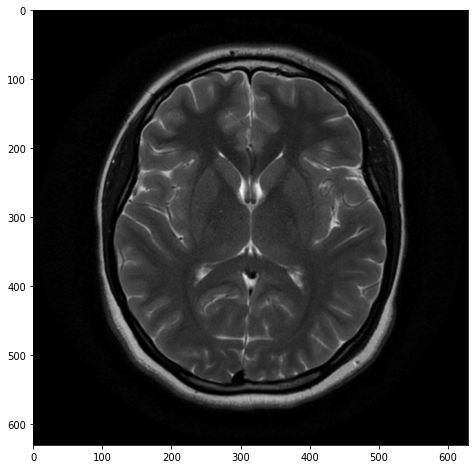

In [11]:
plt.figure(figsize=(16,8))
plt.imshow(img, cmap='gray')

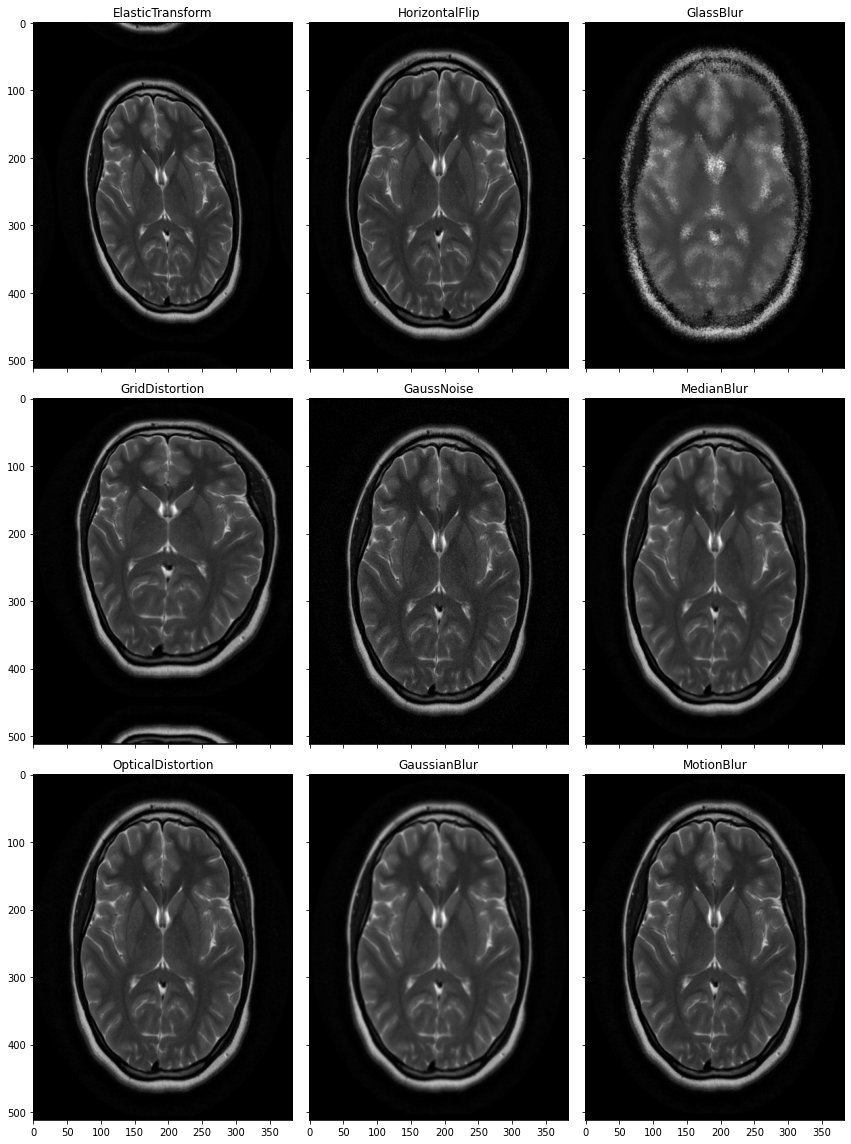

In [12]:
n_rows, n_cols = 3, 3

fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(12, 16))

trfm_ls = [ElasticTransform,
           GridDistortion,
           OpticalDistortion,
           HorizontalFlip,
           GaussNoise,
           GaussianBlur,
           GlassBlur,
           MedianBlur,
           MotionBlur]
for i in range(n_rows*n_cols):
    trfm = Compose([Resize(height=512, width=384, p=1.0), trfm_ls[i](p=1.0)])
    axes[i%n_rows][i//n_cols].imshow(trfm(image=img)['image'], cmap='gray')
    axes[i%n_rows][i//n_cols].set_title(f'{trfm_ls[i].__name__}')

plt.tight_layout()

## 5. Reference
- [Radiopaedia](https://radiopaedia.org/cases/normal-brain-mri-6)
- [Albumentations](https://github.com/albumentations-team/albumentations)